            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)
(1198, 60)
(1198,)
(1198, 60, 1)
Epoch 1/100
38/38 [==============================] - 44s 139ms/step - loss: 0.0283
Epoch 2/100
38/38 [==============================] 

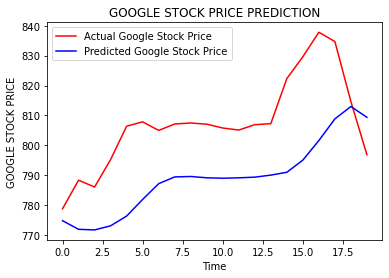

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

df = pd.read_csv(r'Google_Stock_Price_Train.csv')
print(df)
df.head()
training_set = df.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

#Scaling
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

X_train = []
Y_train = []
for i in range(60,1258):
    X_train.append(scaled_training_set[i-60:i, 0])
    Y_train.append(scaled_training_set[i, 0])
X_train = np.array (X_train)
Y_train = np.array(Y_train)
print(X_train.shape)
print(Y_train.shape)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

a=X_train.shape
print(a)

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50, return_sequences= True))
regressor.add(Dropout (0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout (0.2))

regressor.add(Dense (units=1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

dataset_test= pd.read_csv('Google_Stock_Price_Test.csv')
actual_stock_price=dataset_test.iloc[:,1:2].values

dataset_total=pd.concat((df['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total [len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('GOOGLE STOCK PRICE PREDICTION')
plt.xlabel('Time')
plt.ylabel('GOOGLE STOCK PRICE')
plt.legend()

print("\nThe below graph shows the stock price prediction and actual price of google stocks!")
print("A PROJECT BY KRUNALI SHAH(21BCE130)")
